$$0=A_1- B\chi_1 - \mu_{11}\chi_1^2 -\chi_1 \mu_{12}\chi_2$$
$$0=A_2- B\chi_2 - \chi_2 \mu_{21}\chi_1 -\mu_{22}\chi_2^2-\chi_2 \mu_{23}\chi_3$$
$$0=A_3- B\chi_3-\chi_3 \mu_{32}\chi_2- \mu_{33}\chi_3^2$$

In [1]:
using NLsolve, Plots, Parameters, LinearAlgebra

In [24]:
using BifurcationKit
using LinearAlgebra
using Setfield

# Define the system
function BCL2(X, p)
    A1, A2, A3, B = p
    μ₁₁ = 16273.465487425427
    μ₂₂ = 7800.653148254713
    μ₃₃ = 140.00867213154856

    μ₁₂ = 8.841868906761077e-7
    μ₁₃ = 0.0
    μ₂₃ = 11.674613405026601

    μ₂₁ = 0.0583254283653529
    μ₃₁ = 0.0
    μ₃₂ = 23.34605808990502

    χ₁, χ₂, χ₃ = X

    return [
        A1 - B*χ₁ - μ₁₁*χ₁^2 - χ₁*μ₁₂*χ₂,
        A2 - B*χ₂ - χ₂*μ₂₁*χ₁ - μ₂₂*χ₂^2 - χ₂*μ₂₃*χ₃,
        A3 - B*χ₃ - χ₃*μ₃₂*χ₂ - μ₃₃*χ₃^2
    ]
end

params = (A1 = 370.91, A2 = 2.10, A3 = 5., B = 0.255)
x0 = [80000, 20000, 1.]

prob = BifurcationProblem(BCL2, x0, params, (@lens _.A3))

opts_br = ContinuationPar(p_min = 0., p_max = 1200.)
br = continuation(prob, PALC(), opts_br)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 401
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter A3 starts at 5.0, ends at 60.93964440087895
 ├─ Algo: PALC
 └─ Special points:

- #  1, endpoint at A3 ≈ +61.08106507,                                                                     step = 401


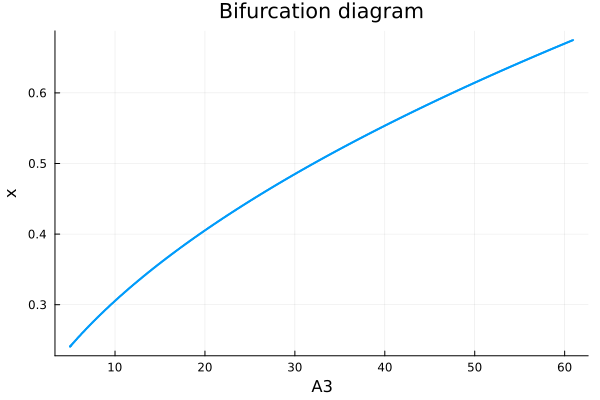

In [25]:
scene = plot(br, legend =:topleft, title = "Bifurcation diagram")

In [4]:
A_min = 0.
A_max = 200
A_step = (A_max - A_min) / 100
B = 0.255 

μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856

μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601

μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

function BCL2(X, A)
    χ₁, χ₂, χ₃ = X

    return [
        A - B*χ₁ - μ₁₁*χ₁^2 - χ₁*μ₁₂*χ₂ - χ₁*μ₁₃*χ₃,
        A - B*χ₂ - χ₂*μ₂₁*χ₁ - μ₂₂*χ₂^2 - χ₂*μ₂₃*χ₃,
        A - B*χ₃ - χ₃*μ₃₁*χ₁ - χ₃*μ₃₂*χ₂ + μ₃₃*χ₃^2
    ]
end

BCL2 (generic function with 1 method)

In [5]:
initial_guesses = [
    [0, 0, 0],
    [0, 0, B/μ₃₃],
    [B/μ₁₁, 0, 0],
    [B/μ₁₁, 0, B/μ₃₃],
    [0, B/μ₂₂, 0],
    [-(B*(μ₁₂-μ₂₂))/(μ₁₁*μ₂₂- μ₁₂*μ₂₁), (B*(μ₁₁-μ₂₁))/(μ₁₁*μ₂₂- μ₁₂*μ₂₁), 0],
    [0,-(B*(μ₂₃-μ₃₃))/(μ₃₃*μ₂₂- μ₂₃*μ₃₂), (B*(μ₂₂-μ₃₂))/(μ₃₃*μ₂₂- μ₂₃*μ₃₂)], 
    [B*(μ₁₂*μ₂₃ - μ₁₂*μ₃₃ + μ₂₂*μ₃₃ - μ₂₃*μ₃₂)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃),-B*(μ₁₁*μ₂₃ - μ₁₁*μ₃₃ + μ₂₁*μ₃₃)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃),B*(μ₁₁*μ₂₂ - μ₁₁*μ₃₂ - μ₁₂*μ₂₁ + μ₂₁*μ₃₂)/(μ₁₁*μ₂₂*μ₃₃ - μ₁₁*μ₂₃*μ₃₂ - μ₁₂*μ₂₁*μ₃₃)]
]


initial_guesses = [
  [0,0,0],
  [0,0,0.00714241471457156 * B]   
]

results1 = []
results2 = []
#results3 = []
#results4 = []
#results5 = []
#results6 = []
#results7 = []
#results8 = []

results = [results1, results2]#, results3, results4, results5, results6, results7, results8];

2-element Vector{Vector{Any}}:
 []
 []

In [6]:
idx = 1

for guess in initial_guesses
    for A in A_min:A_step:A_max
        result = nlsolve(x -> BCL2(x, A), guess)

        push!(results[idx], (A, guess, result.zero))
    end
    idx += 1
end

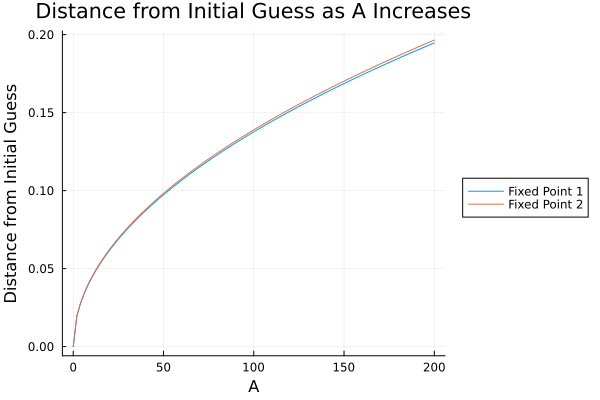

In [7]:
plt = plot(title="Distance from Initial Guess as A Increases", xlabel="A", ylabel="Distance from Initial Guess", legend=:outerright)

# Loop through each set of results
for i in 1:length(results)
    distances = []
    for (A, initial_guess, solution) in results[i]
        push!(distances, norm(solution - initial_guess))
    end
    plot!(A_min:A_step:A_max, distances, label="Fixed Point $i")
end

# Display the plot
display(plt)